In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("water-quality-nooutliers.csv")

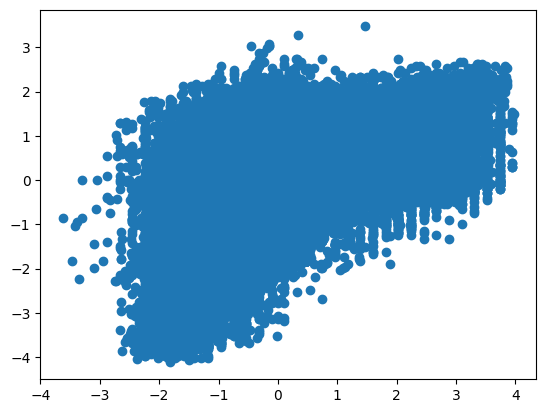

correlation matrix is 
 [[1.         0.41170986]
 [0.41170986 1.        ]]


In [4]:
#correlation matrix
x=df.iloc[:,0]
y=df.iloc[:,1]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, y)
plt.show()
print("correlation matrix is \n",np.corrcoef([x,y]))

In [15]:
pca_columns = ['pH', 'DO', 'Conductivity', 'Temperature', 'Total_N', 'Total_P',
               'Nitrate', 'Orthophosphate']
X = df[pca_columns]

In [16]:
#standardise the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Mean of each feature: {X_scaled.mean(axis=0).round(6)}")
print(f"Std of each feature: {X_scaled.std(axis=0).round(6)}") #confirms

Mean of each feature: [-0. -0.  0.  0.  0.  0. -0. -0.]
Std of each feature: [1. 1. 1. 1. 1. 1. 1. 1.]


In [19]:
pca = PCA() #keep all components

pca.fit(X_scaled)

print(f"Number of components: {pca.n_components_}")
print(f"Shape of components: {pca.components_.shape}")

Number of components: 8
Shape of components: (8, 8)


In [20]:
X_pca = pca.transform(X_scaled)

components = [f'PC{i+1}' for i in range(X_pca.shape[1])]
X_pca_df = pd.DataFrame(X_pca, columns=components)

print("Transformed data shape:", X_pca_df.shape)
print("\nPrincipal Components (first 5 rows):")
print(X_pca_df.head())
#the first column of this new matrix corresponds to PC1 and explains the majority of the variation

X_pca_df['Year'] = df['Year'].values
X_pca_df['Month'] = df['Month'].values
X_pca_df['Season'] = df['Season'].values

Transformed data shape: (138981, 8)

Principal Components (first 5 rows):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.596802  1.715750  0.803973 -0.244608  0.036532 -0.540342 -0.561895   
1 -0.047548  1.694240  0.418427 -0.275222  0.030157  0.288611 -0.833043   
2 -0.632656  1.458033  1.262007 -0.386472  0.050313  0.323782 -0.586331   
3  0.201179  1.400936  0.449215 -0.471436  0.041806  0.736571 -0.985174   
4 -0.220086  1.095570  0.735155 -0.299077  0.035439 -0.418967 -0.735419   

        PC8  
0 -0.092179  
1  0.436352  
2 -0.256761  
3 -0.297561  
4 -0.405465  


In [21]:
loadings_df = pd.DataFrame(
    pca.components_.T,
    columns=components,
    index=pca_columns
)

print(loadings_df)

                     PC1       PC2       PC3       PC4       PC5       PC6  \
pH             -0.333508  0.119754  0.701652  0.001064  0.011624  0.007441   
DO             -0.108062 -0.533872  0.524851  0.005626  0.006142 -0.359178   
Conductivity    0.167418  0.239164  0.022805  0.868418 -0.056248 -0.394444   
Temperature    -0.215717  0.642097  0.279871  0.041967  0.005077  0.376749   
Total_N         0.342103 -0.394666  0.196859  0.371994 -0.025941  0.734626   
Total_P         0.602325  0.130294  0.241857 -0.215738  0.018589 -0.074812   
Nitrate         0.000350 -0.005861 -0.016098  0.067503  0.997569  0.002129   
Orthophosphate  0.568070  0.241619  0.236347 -0.233619  0.021796 -0.167728   

                     PC7       PC8  
pH             -0.000492  0.618000  
DO             -0.004866 -0.546564  
Conductivity    0.029127  0.022447  
Temperature     0.043138 -0.563261  
Total_N        -0.094393  0.028516  
Total_P         0.713117  0.026696  
Nitrate         0.000850  0.000696  
O

In [22]:
output_path = "PCA_transformed_dataset.csv"
df.to_csv(output_path, index=False)

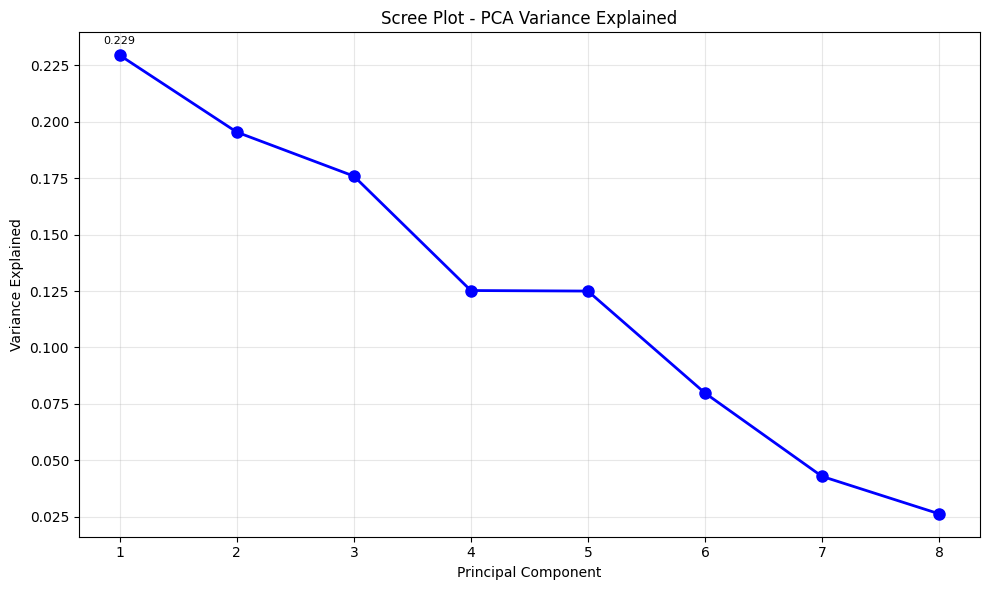

In [32]:
#Scree plot: The x-axis displays the principal component and the y-axis displays the percentage of total variance explained by each individual principal component.
PC_values = np.arange(pca.n_components_) + 1
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue', markersize=8)
plt.title('Scree Plot - PCA Variance Explained')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.grid(True, alpha=0.3)

for i, (pc, var) in enumerate(zip(PC_values, cumulative_variance)):
    if i % 2 == 0:
        plt.annotate(f'{var:.3f}', (pc, var), textcoords="offset points",
                     xytext=(0,8), ha='center', fontsize=8)

plt.tight_layout()
plt.show()

In [33]:
print(pca.explained_variance_ratio_)

[0.22943955 0.19539725 0.17591079 0.12522228 0.1249836  0.07982452
 0.04290075 0.02632127]


In [31]:
print(f"Total components: {pca.n_components_}")
print(f"Total variance explained: {cumulative_variance[-1]:.4f} ({cumulative_variance[-1]*100:.2f}%)")

#optimal number of components
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print(f"Components needed for 95% variance: {n_components_95}")
print(f"Variance explained by first 2 components: {cumulative_variance[1]:.4f} ({cumulative_variance[1]*100:.2f}%)")

Total components: 8
Total variance explained: 1.0000 (100.00%)
Components needed for 95% variance: 7
Variance explained by first 2 components: 0.4248 (42.48%)
